- train.csv - 훈련 데이터로 사용되는 승객의 약 2/3(~8700)에 대한 개인 기록.


    - PassengerId- 각 승객에 대한 고유 ID입니다. 각 ID는 승객이 함께 여행하는 그룹 gggg_pp을 gggg나타내며 그룹 pp내 번호입니다. 그룹의 사람들은 종종 가족 구성원이지만 항상 그런 것은 아닙니다.
   - HomePlanet- 승객이 출발한 행성, 일반적으로 영구 거주 행성입니다.
   
    - CryoSleep- 승객이 항해 기간 동안 정지된 애니메이션에 들어가도록 선택했는지 여부를 나타냅니다. cryosleep의 승객은 객실에 국한됩니다.
    
    - Cabin- 승객이 머물고 있는 객실 번호. Port 또는 Starboard용일 수 있는 형식 deck/num/side을 취 합니다 .sidePS
    
    - Destination- 승객이 출발할 행성입니다
    
    - Age- 승객의 나이.
    
    - VIP- 승객이 항해 중 특별 VIP 서비스를 지불했는지 여부.
    
    - RoomService, FoodCourt, ShoppingMall, - 승객이 우주선 타이타닉 의 다양한 고급 편의 시설 에 대해 청구 Spa한 VRDeck금액 입니다.
    
    - Name- 승객의 성과 이름.
    
    - Transported- 승객이 다른 차원으로 이송되었는지 여부. 이것은 예측하려는 대상인 열입니다.
    
    - test.csv - 테스트 데이터로 사용되는 나머지 승객의 1/3(~4300)에 대한 개인 기록. Transported당신의 임무는 이 세트에 있는 승객 의 가치를 예측하는 것 입니다.


- sample_submission.csv - 올바른 형식의 제출 파일입니다.
- PassengerId- 테스트 세트의 각 승객에 대한 ID입니다.
- Transported- 목표. 각 승객에 대해 True또는 를 예측 False하십시오.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

#sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


### train data 불러오기

In [2]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

df_train.shape, df_test.shape

((8693, 14), (4277, 13))

### 결측치 확인 및 정보보기

In [3]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


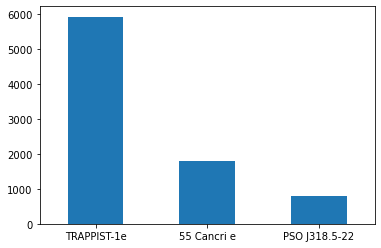

In [5]:
print(df_train['Destination'].value_counts())
df_train['Destination'].value_counts().plot.bar(rot=0)
plt.show()

In [6]:
df_train.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [7]:
df_train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

### False = 0, True = 1 로 변경하는 binary_func 함수 만들기

In [8]:
def binary_func(data):
    if data == False :
        return 0
    else:
        return 1
    
def sum_pass(data):
    result = data.split('_')
    return result[0] + result[1]

# df_train = df_train.dropna()
# df_train.isnull().sum()

df_train['VIP'] = df_train['VIP'].apply(binary_func)
df_train['CryoSleep'] = df_train['CryoSleep'].apply(binary_func)
df_train['Transported'] = df_train['Transported'].apply(binary_func)

#카테로리 숫자화
df_train['Destination'] = df_train['Destination'].astype('category').cat.codes
df_train['HomePlanet'] = df_train['HomePlanet'].astype('category').cat.codes
df_train['PassengerId'] = df_train['PassengerId'].apply(sum_pass)

df_train = df_train.drop(columns=['Cabin', 'Name'])
df_train

In [9]:
def binary_func(data):
    if data == False :
        return 0
    else:
        return 1
    
def sum_pass(data):
    result = data.split('_')
    return result[0] + result[1]


df_test = df_test.dropna()
df_test.isnull().sum()

df_test['VIP'] = df_test['VIP'].apply(binary_func)
df_test['CryoSleep'] = df_test['CryoSleep'].apply(binary_func)
#카테로리 숫자화
df_test['Destination'] = df_test['Destination'].astype('category').cat.codes
df_test['HomePlanet'] = df_test['HomePlanet'].astype('category').cat.codes
df_test['PassengerId'] = df_test['PassengerId'].apply(sum_pass)
df_test = df_test.drop(columns=['Cabin', 'Name'])
df_test

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,001301,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,001801,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,001901,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,002101,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,002301,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4269,926301,0,1,2,43.0,0,0.0,0.0,0.0,0.0,0.0
4270,926501,2,0,2,43.0,0,47.0,0.0,3851.0,0.0,0.0
4271,926601,0,0,2,40.0,0,0.0,865.0,0.0,3.0,0.0
4272,926602,0,1,2,34.0,0,0.0,0.0,0.0,0.0,0.0


## Drop columns

le = LabelEncoder()
le = le.fit(df_train['PassengerId'])   #train['col']을 fit
df_train['PassengerId'] = le.transform(df_train['PassengerId'])   #train['col']에 따라 encoding

## model - KNN 

In [16]:
df_train = df_train.dropna()

In [17]:
X = df_train.drop(columns='Transported')
y = df_train[['Transported']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.3, shuffle=True, )

In [19]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [20]:
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [21]:
print('테스트 세트 예측 :', clf.predict(X_test))

테스트 세트 예측 : [0 1 0 ... 1 0 1]


In [22]:
print('테스트 세트 정확도 : {:.2f}'.format(clf.score(X_test, y_test)))

테스트 세트 정확도 : 0.61


In [23]:
df_train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,000101,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,000201,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,000301,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,000302,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,000401,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,927601,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,927801,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,927901,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,928001,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


## Model - tensorflow 

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense
import tensorflow as tf
from tensorflow import keras

 from keras import models
  from keras import layers

model = keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(11,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [26]:

# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(60, input_shape=(11,), activation='relu'))
#     model.add(layers.Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [27]:
estimator = KerasClassifier(model=create_baseline, epochs=10, batch_size=30, verbose=0)
print(estimator)

kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

KerasClassifier(
	model=<function create_baseline at 0x000001494257EEE0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=30
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)
Baseline: 68.35% (8.52%)


## Model - XGBoost

In [44]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [45]:
df_test

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,001301,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,001801,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,001901,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,002101,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,002301,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4269,926301,0,1,2,43.0,0,0.0,0.0,0.0,0.0,0.0
4270,926501,2,0,2,43.0,0,47.0,0.0,3851.0,0.0,0.0
4271,926601,0,0,2,40.0,0,0.0,865.0,0.0,3.0,0.0
4272,926602,0,1,2,34.0,0,0.0,0.0,0.0,0.0,0.0


In [61]:
X = df_train.drop(columns=['Transported', 'PassengerId'])
y = df_train[['Transported']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=100, shuffle=True, )

In [62]:
test_x = df_test[[ 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

In [64]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
d_val = xgb.DMatrix(data=)
dtest = xgb.DMatrix(data=test_x)

In [65]:
# max_depth = 3, 학습률은 0.1, 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
# 오류함수의 평가성능지표는 logloss
# 부스팅 반복횟수는 400
# 조기중단을 위한 최소 반복횟수는 100

params = {'max_depth' : 3,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'auc',
         'early_stoppings' : 100 }

num_rounds = 400

In [66]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stoppings" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[0]	train-auc:0.80820	eval-auc:nan
[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[1]	train-auc:0.82938	eval-auc:nan
[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.

[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[38]	train-auc:0.88155	eval-auc:nan
[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[39]	train-auc:0.88169	eval-auc:nan
[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[40]	train-auc:0.88391	eval-auc:nan
[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[41]	train-auc:0.88431	eval-auc:nan
[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[42]	train-

[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[78]	train-auc:0.89194	eval-auc:nan
[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[79]	train-auc:0.89198	eval-auc:nan
[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[80]	train-auc:0.89202	eval-auc:nan
[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[81]	train-auc:0.89226	eval-auc:nan
[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[82]	train-

[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[118]	train-auc:0.89687	eval-auc:nan
[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[119]	train-auc:0.89690	eval-auc:nan
[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[120]	train-auc:0.89706	eval-auc:nan
[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[121]	train-auc:0.89707	eval-auc:nan
[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[122]	t

[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[158]	train-auc:0.90057	eval-auc:nan
[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[159]	train-auc:0.90054	eval-auc:nan
[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[160]	train-auc:0.90086	eval-auc:nan
[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[161]	train-auc:0.90094	eval-auc:nan
[17:11:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[162]	t

[17:11:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[198]	train-auc:0.90332	eval-auc:nan
[17:11:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[199]	train-auc:0.90335	eval-auc:nan
[17:11:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[200]	train-auc:0.90345	eval-auc:nan
[17:11:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[201]	train-auc:0.90359	eval-auc:nan
[17:11:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[202]	t

[17:11:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[238]	train-auc:0.90685	eval-auc:nan
[17:11:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[239]	train-auc:0.90692	eval-auc:nan
[17:11:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[240]	train-auc:0.90698	eval-auc:nan
[17:11:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[241]	train-auc:0.90709	eval-auc:nan
[17:11:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[242]	t

[17:11:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[278]	train-auc:0.90945	eval-auc:nan
[17:11:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[279]	train-auc:0.90955	eval-auc:nan
[17:11:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[280]	train-auc:0.90962	eval-auc:nan
[17:11:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[281]	train-auc:0.90974	eval-auc:nan
[17:11:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[282]	t

[17:11:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[318]	train-auc:0.91275	eval-auc:nan
[17:11:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[319]	train-auc:0.91291	eval-auc:nan
[17:11:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[320]	train-auc:0.91306	eval-auc:nan
[17:11:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[321]	train-auc:0.91309	eval-auc:nan
[17:11:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[322]	t

[357]	train-auc:0.91591	eval-auc:nan
[17:11:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[358]	train-auc:0.91611	eval-auc:nan
[17:11:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[359]	train-auc:0.91618	eval-auc:nan
[17:11:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[360]	train-auc:0.91630	eval-auc:nan
[17:11:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[361]	train-auc:0.91636	eval-auc:nan
[17:11:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only 

[17:11:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[398]	train-auc:0.91905	eval-auc:nan
[17:11:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:330: Dataset is empty, or contains only positive or negative samples.
[399]	train-auc:0.91908	eval-auc:nan


In [41]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

NameError: name 'xgb_model' is not defined

In [42]:
# 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [43]:
get_clf_eval(y_test, preds)

NameError: name 'preds' is not defined

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

In [ ]:
# max_depth = 3, 학습률은 0.1, 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
# 부스팅 반복횟수는 400

from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)

In [ ]:
# 예측 결과 확인
get_clf_eval(y_test, w_preds)

In [ ]:
# max_depth = 3, 학습률은 0.1, 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
# 오류함수의 평가성능지표는 logloss
# 부스팅 반복횟수는 400
# 조기중단을 위한 최소 반복횟수는 100

# 아래 예제에서는 평가를 위한 데이터 세트로 테스트 데이터 세트를 사용했지만, 바람직하진 않습니다.
# 테스트 데이터 세트는 학습에 완전히 알려지지 않은 데이터 세트를 사용해야 합니다.
# 평가에 테스트 데이터 세트를 사용하면 학습시에 미리 참고가 되어 과적합할 수 있기 때문입니다.

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1 , max_depth = 3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, 
                eval_metric="auc", eval_set = evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)

In [ ]:
get_clf_eval(y_test, ws100_preds)

In [ ]:
ws100_preds

In [ ]:
submission = pd.DataFrame({
        "PassengerId": X_test["PassengerId"],
        "Transported":  ws100_preds})

submission['Transported'] = submission['Transported'].astype('bool')
df_2 = submission.drop(columns='PassengerId').reset_index()
# df_2 = submission.copy()
df_2
# submission.to_csv('submission.csv', index=False)
df_2['PassengerId'] = df_2['index']
df_2

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [ ]:
inv_s1 = le.inverse_transform(df_2['PassengerId'])
# inv_s2 = ohe.inverse_transform(df_2['PassengerId']).ravel()


In [ ]:
pd.DataFrame(inv_s1)

In [ ]:
df_3 = df_2[['PassengerId', 'Transported']]
df_3.to_csv('./submission.csv', index=False)

In [ ]:
df_3['PassengerId'] = df_3['PassengerId'].astype('str')

In [ ]:
df_3. inv_s1

In [ ]:
type(inv_s1)

In [ ]:
df_3['PassengerId_'] =inv_s1
df_3

In [ ]:
df_3.to_csv('./submission.csv', index=False)

In [ ]:
# early_stopping_rounds = 10 으로 설정하고 재학습
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 10, 
                eval_metric='auc', eval_set=evals , verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
get_clf_eval(y_test, ws10_preds)

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))

plot_importance(xgb_wrapper, ax=ax) 

# Train 다시불러와 검증

In [ ]:
train = pd.read_csv('./train.csv')
train.head(5)

In [ ]:
train['HomePlanet'].value_counts().plot.bar()

In [ ]:
train['Destination'].value_counts().plot.bar()

In [ ]:
def binary_func(data):
    if data == False :
        return 0
    else:
        return 1
    
    
# True, False 인 값들 1, 0 으로 치환
train['VIP'] = train['VIP'].apply(binary_func)
train['Transported'] = train['Transported'].apply(binary_func)
train['CryoSleep'] = train['CryoSleep'].apply(binary_func)
train

In [ ]:
train['Name'].value_counts()[:30]

In [ ]:
train.isnull().sum()